In [24]:
# Import packages
import pandas as pd
import keras
from matplotlib import pyplot 
from matplotlib.image import imread

# Keras preprocessing
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# Load and prepare Planet dataset using these packages
from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import savez_compressed
from pandas import read_csv

In [25]:
# Set plot size
pyplot.rcParams['figure.figsize'] = [15, 10]

In [26]:
def plot_first_nine(folder = 'train-jpg/'):
    '''
    Input: File path to training data.
    Output: Plot of first 9 images in training data.
    
    We plot 9 images because otherwise we will have to
    write formatting code for the sub-plot which is not
    worth the time.
    '''
    for i in range(9):
        # pyplot.subplot takes 3 digit code 
        # The first number is the number of rows
        # The second number is the number of columns
        # The third number is the position in the subplot 
        pyplot.subplot(340 + 1 + i)
        # Define filename
        filename = folder + 'train_' + str(i) + '.jpg'
        # Load image pixels
        image = imread(filename)
        # Plot raw pixel data
        pyplot.imshow(image)
    # Show the figure
    pyplot.show()
    # End the function
    return

In [27]:
def load_mapping_data(file_name = 'train_v2.csv'):
    '''
    Input: mapping file name
    Output: mapping file data-frame
    '''
    mapping = pd.read_csv(file_name)
    print(mapping.shape)
    print(mapping.head())
    return(mapping)

In [28]:
def create_tag_mapping(mapping):
    '''
    Input: mapping data-frame
    Output: Dictionary mapping labels to integers.
    '''
    # Initialize labels
    # Labels is a set so calling update will not affect uniqueness
    labels = set()
    
    # Loop through the data-frame
    # Split the tag values on spaces
    # Then update the set with the tags
    for i in range(len(mapping)):
        tags = mapping['tags'][i].split(' ')
        labels.update(tags)
    
    # Turn into a list and sort
    labels = list(labels)
    labels.sort()
    
    # First relate labels to integers
    labels_map = {labels[i]:i for i in range(len(labels))}
    inv_labels_map = {i:labels[i] for i in range(len(labels))}
    
    # Return statement
    return(labels_map, inv_labels_map)

In [29]:
def create_file_mapping(mapping_df):
    '''
    Input: mapping data-frame
    Output: mapping dictionary of filename to tags
    '''
    # Initialize the dictionary
    mapping = dict()
    # Iterate through the data-frame range
    for i in range(len(mapping_df)):
        # Store names and tags
        name, tags = mapping_df['image_name'][i], mapping_df['tags'][i]
        # Put them in the dictionary as name:tag key value pairs
        mapping[name] = tags.split(' ')
    
    # Return mapping
    return mapping

In [30]:
def one_hot_encode(tags, mapping):
    '''
    There are 17 elements in tag. 
    We want a 17 element vector of 0s and 1s.
    Each element should be 1 if the corresponding
    category is in the image file and 0 otherwise.
    '''
    # Create empty vector
    encoding = zeros(len(mapping), dtype='uint8')
    # Mark 1 for each tag in the vector
    for tag in tags:
        encoding[mapping[tag]] = 1
    return encoding

In [31]:
def load_dataset(path, file_mapping, tag_mapping, target_size = (128, 128)):
    # Photos and targets stored here
    photos, targets = list(), list()
    # Enumerate files in the directory
    for filename in listdir(folder):
        # Load image
        photo = load_img(path + filename, target_size=target_size)
        # Convert to numpy array
        photo = img_to_array(photo, dtype='uint8')
        # Get tags
        tags = file_mapping[filename[:-4]]
        # One hot encode tags
        target = one_hot_encode(tags, tag_mapping)
        # Store
        photos.append(photo)
        targets.append(target) 
    # We know color channel values go from 0 to 255 and will not be negative
    # Convert to arrays while making data type unsigned
    # Unsigned integer saves space 
    X = asarray(photos, dtype='uint8')
    y = asarray(targets, dtype='uint8')
    
    return(X, y)

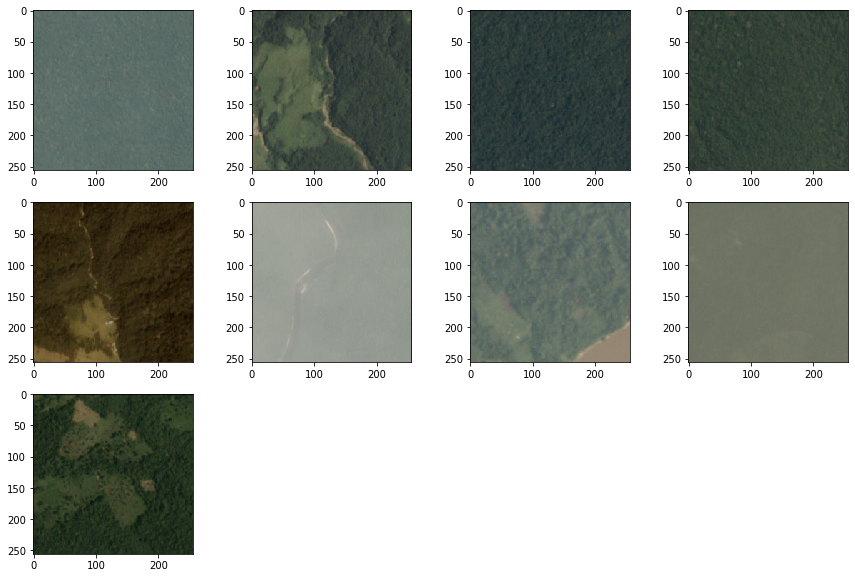

(40479, 2)
  image_name                                       tags
0    train_0                               haze primary
1    train_1            agriculture clear primary water
2    train_2                              clear primary
3    train_3                              clear primary
4    train_4  agriculture clear habitation primary road


In [34]:
if __name__ == '__main__':
    
    plot_first_nine()
    mapping_df = load_mapping_data()
    labels_map, inv_labels_map = create_tag_mapping(mapping_df)
    mapping = create_file_mapping(mapping_df)
    
    